<img src="escuela_economia_una_logo.png" width="260" height="60">
<center>
    <b>Econometría</b><br>
    <b>Profesor:  Alexander Amoretti</b><br>
    <b>Desarrollo:  Diego Armando Barquero Sánchez, Estudiante de Tercer Ciclo</b>
<br><br>   
<div style="font-size:200%;color:white; background-color: #A93226;">Regresión Lineal Simple</div>
<div style="font-size:100%;color:white; background-color: #A93226;">Empleando el tiempo como variable explicativa</div>

<i>Creado:     2023-May-22 
    <br>
    Actualizado: 2023-May-24 </i>

# Librerías Empleadas

In [1]:
# Basics for Data Analysis 
import numpy as np
import pandas as pd
# Basics for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# regression basics 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Datos

### *Se implementa la librería  pandas para cargar un set de datos*

In [2]:
datos = pd.read_excel('datos.xlsx')


### *Se implementa la librería  pandas para visualizar el set de datos y ver con cuales variables estaremos trabajando*

In [3]:
datos.head()

,Año,PIB P Mkt Anual,Var del PIB Anual,PIB,Tiempo
0,1991-12-31,8.810401e+05,NaN,NaN,0
1,1992-12-31,1.151918e+06,30.745229,270877.791757,1
2,1993-12-31,1.362412e+06,18.273396,210494.513791,2
3,1994-12-31,1.647125e+06,20.897659,284712.295339,3
4,1995-12-31,2.079863e+06,26.272340,432738.204050,4


### *Ahora a través de este código corregiremos el índice del DataFrame con la intención de facilitar el proceso de visualización de los datos*

In [4]:
index = pd.Index(sm.tsa.datetools.dates_from_range("1991", "2022"))
datos.set_index(index, inplace=True)

### *Emplearemos la librería matplotlib para visualizar la serie de tiempo "PIB P MKT Anual"*

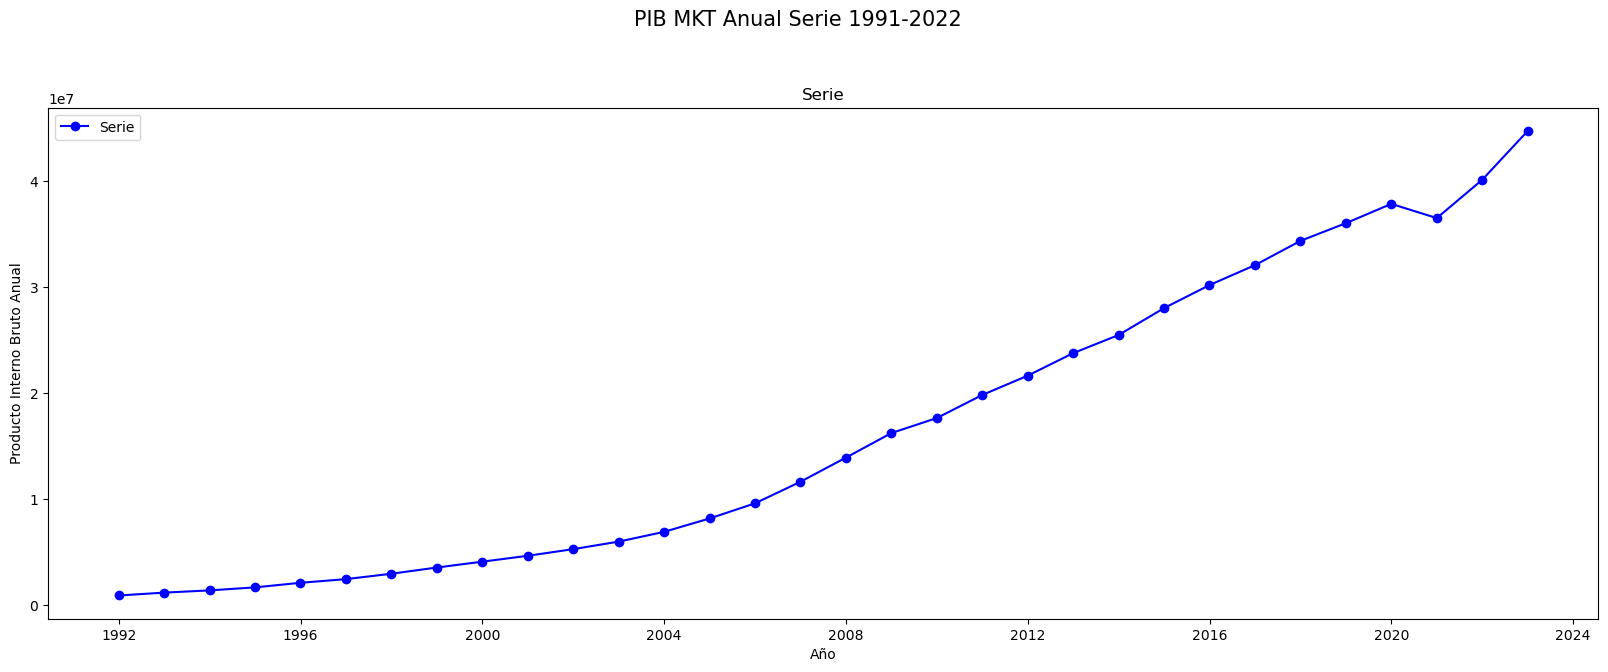

In [5]:
fig, (ax1) = plt.subplots(1,1, figsize = (20,7))
fig.suptitle('PIB MKT Anual Serie 1991-2022', fontsize =15)
ax1.plot(datos.index, datos['PIB P Mkt Anual'], '-o',  color = 'blue', label = 'Serie')
ax1.set(xlabel= 'Año', ylabel= "Producto Interno Bruto Anual")
ax1.set_title('Serie')
ax1.legend(loc='best')
plt.subplots_adjust(top=0.84)
plt.show()

In [6]:
# Creación de un Boxplot e Histograma con la misma escala .


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot e Histogram combinados

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

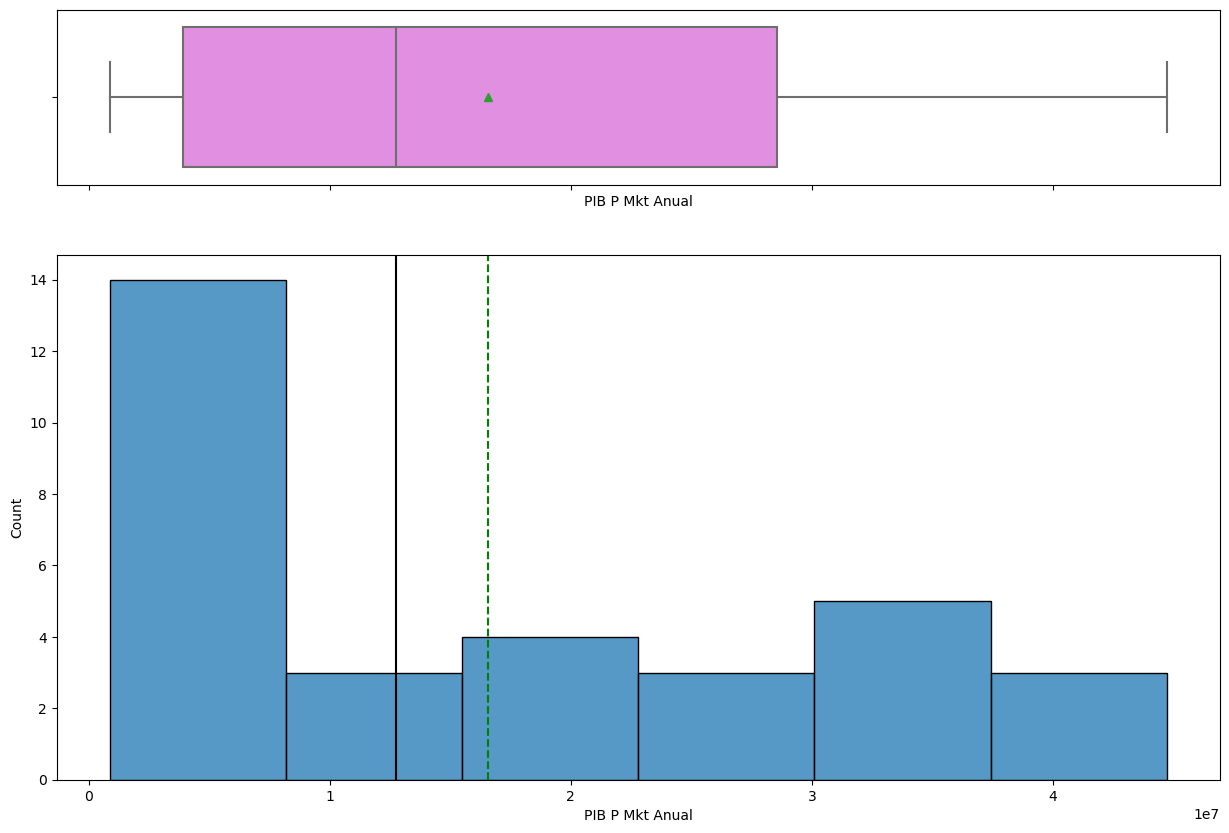

In [7]:
histogram_boxplot(datos, 'PIB P Mkt Anual')

# Regresión Lineal Simple

$ yi=β0+β1xi1+ϵi $

### *Para realizar la regresión lineal simple, se implementará la variable t (tiempo)  como la única variable exógena o explicativa. A su vez se hará uso de la librería statsmodels para el proceso de proyección y análisis de resultados*

In [9]:
# Define la variable dependiente 
y = datos['PIB P Mkt Anual']

# Define la variable explicativa 
x = datos['Tiempo ']

# Se agrega la variable constante
x = sm.add_constant(x)

# Se realiza la regresion como tal 
model = sm.OLS(y, x).fit()

# Se imprime los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        PIB P Mkt Anual   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     518.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.76e-20
Time:                        21:43:55   Log-Likelihood:                -525.03
No. Observations:                  32   AIC:                             1054.
Df Residuals:                      30   BIC:                             1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.967e+06   1.15e+06     -5.177      0.0

####  *Como se observa en los resultados de la regresión, la variable explicativa (t) es significativa en la columna P>]t[ a un nivel de significancia de 0.05.*

#### *El realizar una regresión lineal simple es un método ingenuo para lograr explicar variables tan complejas y extensas como las económicas por lo que es muy poco probable que se cumplan los supuestos con tan solo una variable explicativa y con la serie sin ningún tipo de transformación (log10 o In), no obstante podemos ver que el R2 es sumamente alto al igual que el ajustado lo cual indica que el tiempo si explica en gran parte el comportamiento del PIB. Sin embargo, a continuación se realizarán las pruebas teóricas que implican el uso correcto de este método econométrico*

# Pruebas

## -*Normalidad*-

In [10]:
residuos = pd.DataFrame()
residuos["Ut"] = model.resid

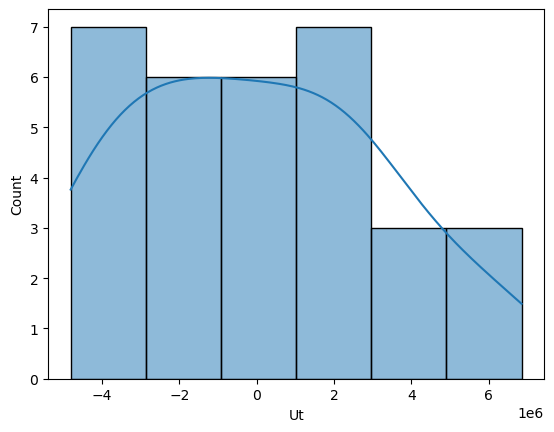

In [11]:
sns.histplot(data = residuos, x = "Ut", kde = True);

In [13]:
JB_pv = sm.stats.stattools.jarque_bera(model.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.5002542855508064


## -*Heterocedasticidad*-

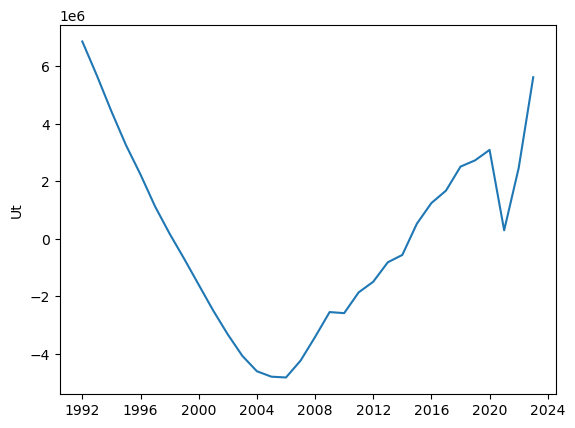

In [14]:
sns.lineplot(data = residuos, x = residuos.index, y = "Ut");

In [15]:
Nombres = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
BP_results = sms.het_breuschpagan(model.resid, model.model.exog)
 
lzip(Nombres, BP_results)

[('Lagrange multiplier statistic', 3.456967327886378),
 ('p-value', 0.06298573798550941),
 ('f-value', 3.633426799035073),
 ('f p-value', 0.06625054041627225)]

## -*Autocorrelación*-

In [16]:
sm.stats.stattools.durbin_watson(model.resid, axis=0)

0.11824399225552344

## -*Multicolinealidad*-

In [17]:
def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))
    
    return result

In [18]:
calculateVIF(x)

,const,Tiempo
VIF,inf,1.0


## -*Herramienta visual*-
*El código es complejo, sin embargo bastante útil debido a que en muchas ocaciones tenemos que hacer uso de funciones creadas por un desarrollador individual debido a que muchas de las funciones establecidas en otros lenguajes como r o stata en python siguen en desarrollo por parte de las grandes librerías como QuantEcon o Statsmodels*

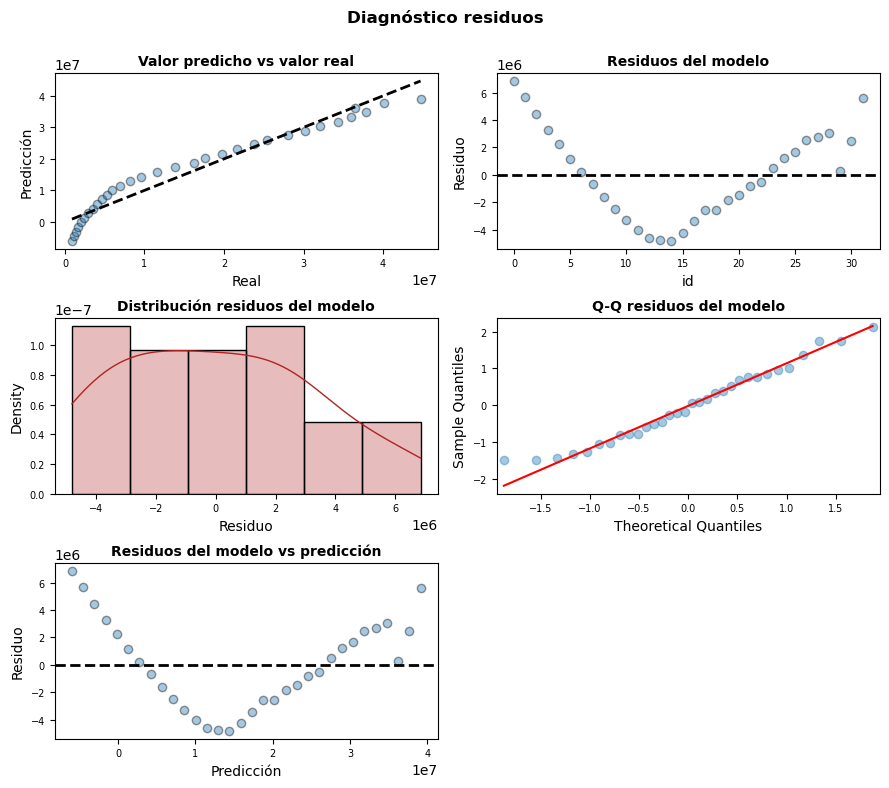

In [19]:
# Gráficos
# ==============================================================================
Diagnostico = fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y, model.fittedvalues, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), residuos["Ut"] ,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos["Ut"] ,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos["Ut"] ,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(model.fittedvalues, residuos["Ut"] ,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

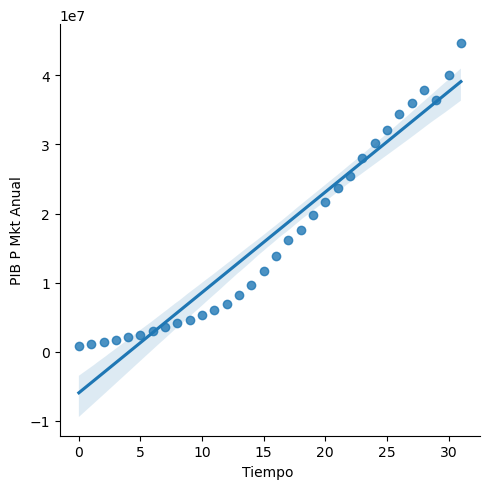

In [16]:
sns.lmplot(data = datos, x = "Tiempo ", y = "PIB P Mkt Anual", height = 5);

# Bibliografía y Documentación de las Librerías

##### Referencias Bibliográficas

*Carrasquilla-Batista, A., Chacon-Rodriguez, A., Núñez-Montero, K., Gómez-Espinoza, O., Valverde-Cerdas, J., & Guerrero-Barrantes, M. (2016). Regresión lineal simple y múltiple: aplicación en la predicción de variables naturales relacionadas con el crecimiento microalgal. Tecnología en Marcha. https://doi.org/10.18845/tm.v29i8.2983*

*Regresión lineal con python. (s. f.). https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html*

*profesorDATA. (2020). Métodos de Selección de Variables: El Factor de Inflación de la Varianza. profesorDATA.com. https://profesordata.com/2020/08/22/metodos-de-seleccion-de-variables-el-factor-de-inflacion-de-la-varianza/*

*GeeksforGeeks. (2022). How to Perform a Breusch Pagan Test in Python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/*

*Randall-Romero. (s. f.). EC4301/Laboratorios at master · randall-romero/EC4301. GitHub. https://github.com/randall-romero/EC4301/tree/master/Laboratorios*

##### Docuimentación Librerías
- Numpy : https://numpy.org/doc/stable/
- Pandas : https://pandas.pydata.org/docs/getting_started/index.html
- Statsmodels : https://www.statsmodels.org/devel/index.html
- Matplotlib : https://matplotlib.org/stable/gallery/index.html
- Seaborn : https://seaborn.pydata.org/
- Scikit-Learn : https://scikit-learn.org/stable/